In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from numpy.linalg import norm

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
X=np.linspace(0,21,50)
print(len(X))

50


In [6]:
a=-2
b=1
Y=a*X+b
print(Y)

[  1.           0.14285714  -0.71428571  -1.57142857  -2.42857143
  -3.28571429  -4.14285714  -5.          -5.85714286  -6.71428571
  -7.57142857  -8.42857143  -9.28571429 -10.14285714 -11.
 -11.85714286 -12.71428571 -13.57142857 -14.42857143 -15.28571429
 -16.14285714 -17.         -17.85714286 -18.71428571 -19.57142857
 -20.42857143 -21.28571429 -22.14285714 -23.         -23.85714286
 -24.71428571 -25.57142857 -26.42857143 -27.28571429 -28.14285714
 -29.         -29.85714286 -30.71428571 -31.57142857 -32.42857143
 -33.28571429 -34.14285714 -35.         -35.85714286 -36.71428571
 -37.57142857 -38.42857143 -39.28571429 -40.14285714 -41.        ]


# Stochastic

In [7]:
def stochastic(X,Y,learn_rate,max_iter):
    theta_0 , theta_1  , counter = 0 , 0 , 0
    cost_list = []
    cost_fun_list = []
    theta_0_list = []
    theta_1_list = []
    predicted=[]
    samples_num = len(Y)
    for i in range(max_iter): 
        for j in range(samples_num):
            # calculate h(theta)
            predicted_Y = theta_0 + theta_1 * X[j]
            predicted.append(predicted_Y)
            # calculate cost function
            cost_fun = ((predicted_Y - Y[j])**2) 
            cost_list.append(cost_fun)
            # calculate gradient
            grad_0 = (predicted_Y - Y[j]) 
            grad_1 = (predicted_Y - Y[j])* X[j] 
            grad =np.array(grad_0,grad_1)
            # update thetas
            theta_0 = theta_0 - (learn_rate * grad_0)
            theta_1 = theta_1 - (learn_rate * grad_1)
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            thetas = np.array(theta_0,theta_1)
            counter += 1 
        if len(cost_list) > 1 :
            if norm(grad) < 0.0001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.0001 :
                break
            elif np.absolute(norm([theta_0_list[i],theta_1_list[i]]) - norm([theta_0_list[i-1],theta_1_list[i-1]])) < 0.0001 :
                break
              
    return theta_0_list , theta_1_list , cost_list , predicted , theta_0_list[-1] , theta_1_list[-1] , counter
    

In [8]:
theta_0_list , theta_1_list , cost_list , predicted , optim_theta_0 , optim_theta_1 , counter  = stochastic(X,Y,0.0005,300)
hypo = optim_theta_0 + optim_theta_1 *X

In [9]:
print(cost_list)

[1.0, 0.020265556122448992, 0.5110577610046939, 2.468944766478302, 5.88448125102543, 10.736882513892073, 16.98884625122653, 24.581662293662774, 33.43079942104559, 43.42219996466372, 54.40954328076769, 66.2127538270507, 78.61802388183624, 91.37959073381592, 104.22345034578524, 116.85310276991568, 128.9573101829651, 140.21971063435444, 150.32997723407624, 158.99605479236678, 165.95685811181295, 170.9946945069287, 173.94659448395544, 174.7137142080664, 173.26802309934587, 169.65561542973552, 163.99618419152878, 156.47845794751316, 147.35170708199118, 136.91374735610626, 125.49617327261392, 113.44780737255589, 101.1175231302809, 88.83766507785627, 76.90923818706341, 65.58987145652225, 55.08529485973369, 45.544734100255155, 37.06026301514893, 29.66980179123775, 23.363150845226297, 18.090237422639817, 13.770644026570357, 10.303488842573165, 7.576827547381356, 5.475920140757751, 3.8899248414976144, 2.716810507764588, 1.8664894380156198, 1.262341051431756, 1.404404908521758, 1.3051603850336237

In [10]:
r2_score(Y,hypo)

0.9972581749233679

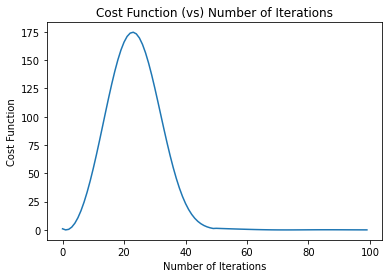

In [11]:
max_i = list(range(counter))
plt.plot(max_i , cost_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Number of Iterations")
plt.show()

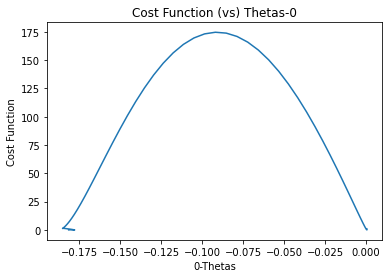

In [12]:
plt.plot(theta_0_list,cost_list)
plt.xlabel("0-Thetas")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas-0")
plt.show()

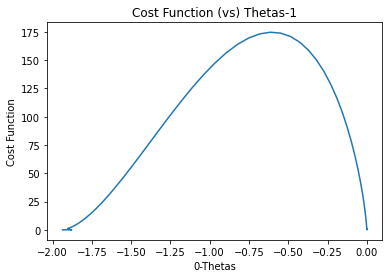

In [13]:
plt.plot(theta_1_list,cost_list)
plt.xlabel("0-Thetas")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas-1")
plt.show()

# Mini Batch

In [14]:
def mini_batch(X,Y,learn_rate,max_iter,batch_size):
    theta_0 , theta_1 , counter = 0 , 0 , 0
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    predicted=[]
    samples_num = int(len(Y) / batch_size)
    for i in range(max_iter): 
        for j in range(1,samples_num):
            start_index = ((j-1)*batch_size)
            end_index = (j*batch_size)
            if j == 1 :
                x_batches = X[:end_index]
                y_batches = Y[:end_index]
            elif j == samples_num :
                x_batches = X[start_index:]
                y_batches = Y[start_index:]
            else :
                x_batches = X[start_index:end_index]
                y_batches = Y[start_index:end_index]
            b = len(x_batches)    
            # calculate h(theta)
            predicted_Y = theta_0 + theta_1 * x_batches
            predicted.append(predicted_Y)
            # calculate cost function
            cost_fun = sum((predicted_Y - y_batches)**2) / (2*b)
            cost_list.append(cost_fun)
            # calculate gradient
            grad_0 = sum(predicted_Y - y_batches) / b
            grad_1 = sum((predicted_Y - y_batches)* x_batches) / b
            grad = np.array([grad_0,grad_1])
            # update thetas
            theta_0 = theta_0 - (learn_rate * grad_0)
            theta_1 = theta_1 - (learn_rate * grad_1)    
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            counter += 1
        if len(cost_list) > 1 :
            if norm(grad) < 0.0001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.0001 :
                break
            elif np.absolute(norm([theta_0_list[i],theta_1_list[i]]) - norm([theta_0_list[i-1],theta_1_list[i-1]])) < 0.0001 :
                break
    return theta_0_list , theta_1_list , cost_list , predicted , theta_0_list[-1] , theta_1_list[-1] , counter

In [15]:
theta_0_list , theta_1_list , cost_list , predicted , optim_theta_0 , optim_theta_1 , counter = mini_batch(X,Y,0.0005,300,10)
hypo = optim_theta_0 + optim_theta_1 * X

In [16]:
r2_score(Y,hypo)

0.9974073716271625

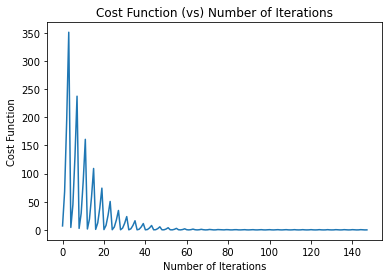

In [17]:
max_iter = list(range(counter))
plt.plot(max_iter,cost_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Number of Iterations")
plt.show()

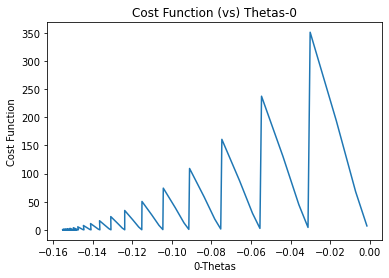

In [18]:
plt.plot(theta_0_list,cost_list)
plt.xlabel("0-Thetas")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas-0")
plt.show()

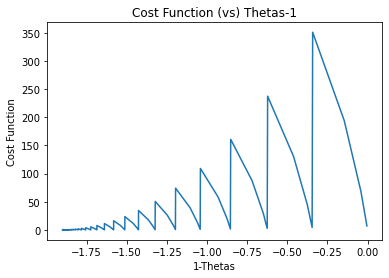

In [19]:
plt.plot(theta_1_list,cost_list)
plt.xlabel("1-Thetas")
plt.ylabel("Cost Function")
plt.title("Cost Function (vs) Thetas-1")
plt.show()